In [2]:
import os
import copy
import pandas as pd 
import math
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
plt.rcParams["figure.figsize"] = (16,8)

In [3]:
dfPesG= pd.read_csv('BD/Dados_distGasoduto_CPUE_coordPequeirosValidadoUpgrade.csv')
print(dfPesG.shape)
print(dfPesG.columns)


/tmp/ipykernel_1884/3409890674.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  dfPesG= pd.read_csv('BD/Dados_distGasoduto_CPUE_coordPequeirosValidadoUpgrade.csv')


(629739, 71)
Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Arte', 'SubArte',
       'TI', 'Comunidade', 'Porto Desembarque', 'Data Registro',
       'Entrevistado', 'Embarcação', 'Núm. Pescadores', 'Pesqueiro', 'Espécie',
       'Captura(kg)', 'Valor/Kg(R$)', 'Data Saída', 'Hora Saída',
       'Data Chegada', 'Hora Chegada', 'Tipo Embarc.', 'Tipo IBAMA',
       'Núm. Linhas', 'Núm. Anzóis', 'Tamanho Anzol', 'Isca', 'Espécie Alvo',
       'Comp. Rede', 'Tamanho Malha', 'Altura Malha', 'Quantas Camboas',
       'Dias Não Despesca Camboa', 'Quant. Morredores',
       'Núm. Pescadores Participaram', 'Proprietário Camboa',
       'Núm. Armadilhas', 'Tamanho Armadilhas', 'Núm. Bocas Armadilha',
       'Utiliza Guincho', 'Quant. Dias Pescou Mês', 'Observação',
       'Profund. Lance', 'Houve Captura', 'Litros Combust.', 'Combustível(R$)',
       'Rancho(R$)', 'Gêlo(R$)', 'Isca(R$)', 'Venda Direta', 'Atravessador',
       'Consumo', 'Peixaria,Mercado', 'Ano', 'Mês', 'KgTotal', 'R

In [21]:
dfPesG.TI.unique()

array(['BTS', 'BAIXO SUL'], dtype=object)

In [17]:
dfPesG.Arte.unique()

array(['CERCO', 'LINHA', 'MERG_MARISC', 'ARMADILHA', 'ARRASTO', 'REÇA',
       'EMALHE'], dtype=object)

In [4]:
dfPesG.SubArte.unique()

array(['ABALO', 'LINHA DE MÃO', 'TARRAFA', 'MARISCAGEM', 'GAIOLA',
       'GROSEIRA', 'CERCO', 'ESPINHEL', 'MERGULHO', 'REDINHA',
       'SUPERFÍCIE BOIADA', 'FUNDO PEIXE', 'EMALHE', 'REÇA', 'PESQUEIRO',
       'ARRAEIRA', 'CALÃO', 'MANZUÁ', 'TAINHEIRA', 'JERERÉ',
       'FUNDO CAMARÃO', 'ARRASTO DE FUNDO OU BALOEIRO', 'Não Informado',
       'PARUZEIRA'], dtype=object)

In [5]:
dfPesG[dfPesG.SubArte == 'LINHA DE MÃO']['Espécie Alvo'].unique()

array(['Caramuru', 'Não Informado', nan, 'caramuru', 'caramuru, baiacu',
       'Vermelho', 'Peixes Grandes', 'Peixe Grande', '9', 'peixes',
       'Peixe', 'Peixes', 'Peixote', 'peixe', 'PEIXES', 'Diversos',
       'vermelha, pampo', 'corongo, bagre', 'baiacu', 'Baiacu', 'Baiacú',
       'Bacalhau', 'Mero', 'Xaréu', 'Miroró', 'corongo, paru, baiacu',
       'caramuru / miroró e baiacu', 'miroro, baiacu', 'baiacu, caramuru',
       'diversos', 'vermelho', 'Cioba', 'divresos', 'cioba', 'chumberga',
       'divversos', 'Diversos e Chumberga', 'varios', 'polvo',
       'chumberga, diversos', 'bicuda', 'CIOBA', 'Cascalho', 'bagre',
       'pescada', 'Baiacu, Barbudo', 'arraia', 'xareu', 'pescada, bagre',
       'Bagre', 'BAIACU', 'bicuda, diversos', 'Corongo',
       'corongo, caramuru', 'Cabeçudo e carapeba', 'arraia, corongo',
       'Siri', 'Corvina', 'baiacú', 'peixote', 'pEIXES', 'peixea',
       '´peixes', 'Tainha', 'corongo', 'Mistura, Corongo',
       'arraia, robalo', 'robalo', 'b

In [11]:
dfPesG[dfPesG.SubArte == 'MARISCAGEM']['Espécie'].unique()

array(['Sururu', 'Ostra', 'Siri-de-mangue catado', 'Siri-de-mangue',
       'Siri', 'Ostra catada', 'Caranguejo', 'Siri-mole', 'Siri catado',
       nan, 'Peguari', 'Machadinho', 'Sacarauna', 'Caramuru', 'Chumbinho',
       'Rala-côco', 'Befum', 'Tarioba', 'Lambreta catada',
       'Lambreta (dúzia)', 'Chumberga', 'Siri-duro', 'Camarão',
       'Cabeçudo', 'Gorogondé', 'Tainha', 'Aratu', 'Sambá',
       'Sambá catado', 'Befum catado', 'Marisco', 'Outros', 'Mistura',
       'Tapu', 'Mariscada', 'Lambreta', 'Baiacu', 'Pescada', 'Polvo',
       'Caranguejo em corda', 'Sururu catado', 'Caranguejo catado',
       'Siri-de-mangue em corda', 'Sururu de mangue', 'Sambá- criola',
       'Siri com casca', 'Linguado', 'Siri em corda', 'Xangó',
       'Sururu (litro)', 'aratu catado', 'Lagosta', 'Bebefumo', 'Agulha',
       'Cioba', 'Ariocó', 'Budião-batata', 'Agulhão', 'Aribi', 'Pocoman',
       'Mijão', 'Mapé', 'Sauna', 'Bebefumo catado',
       'Siri catado e Aratu catado', 'Siri-duro em corda'

In [18]:
dfPesG[dfPesG.Arte == 'ARMADILHA']['Espécie'].unique()

array(['Siri catado', 'Siri', 'Siri-de-mangue catado', 'Siri com casca',
       nan, 'Siri em corda', 'Siri-duro', 'Siri-de-mangue em corda',
       'Siri-cachanga em corda', 'Caramupim', 'Cassaca', 'Siri-mole',
       'Siri-duro com casca', 'Miroró', 'Carrapato', 'Siri-bóia em corda',
       'Siri-branco em corda', 'Siri-branco', 'Siri-bóia', 'Aratu',
       'Siri-duro em corda', 'Caramuru', 'Siri-de-mangue', 'Chumberga',
       'Sambá catado', 'aratu catado', 'Corongo', 'Caçaca',
       'Siri-bóia com casca', 'Carapeba', 'Baiacu', 'Ariocó', 'Cioba',
       'Bicuara', 'Budião', 'Garauba', 'Budião-batata', 'Baiacu-ara',
       'Saramonete', 'Agulha', 'Badejo', 'Guaraiúba', 'Barbeiro',
       'Cambuba', 'Siri-de-coroa catado', 'Siri-de-coroa com casca',
       'Guaricema', 'Carapitanga', 'Mulatinha', 'Polvo', 'Cabeçudo',
       'Lagosta', 'Batata', 'Sororoca', 'Pescada', 'Bagre', 'Vermelho',
       'Xangó', 'Siri-branco com casca', 'Sambuio', 'Margarida',
       'Papaterra', 'Pinima', '

In [23]:
dfPesG[(dfPesG.Arte == 'REÇA') & (dfPesG.TI == 'BTS')].shape

(53957, 71)

In [20]:
lst_Siri = [
    'Siri catado', 'Siri', 'Siri-de-mangue catado', 'Siri com casca',
    'Siri em corda', 'Siri-duro', 'Siri-de-mangue em corda',
    'Siri-cachanga em corda', 'Siri-mole',
    'Siri-duro com casca',  'Siri-bóia em corda',
    'Siri-branco em corda', 'Siri-branco', 'Siri-bóia',
    'Siri-duro em corda', 'Siri-de-mangue', 'Siri-de-coroa catado',
    'Siri-de-coroa com casca',
    'Siri-branco com casca',  'Siri-bóia catado','Siri-cachanga',
    'Siri-de-mangue mole', 'Siri-bóia sujo', 'Siri-branco catado'
]
df_filteredSiri = dfPesG[(dfPesG.Arte == 'ARMADILHA') & (dfPesG['Espécie'].isin(lst_Siri))]
df_filteredSiri.shape

(66879, 71)

In [22]:
df_filtered[df_filtered['TI'] == 'BTS'].shape

(15862, 71)

In [7]:
df_filteredCav = dfPesG[(dfPesG.SubArte == 'LINHA DE MÃO') & (dfPesG['Espécie'] == 'Cavala')]
df_filteredCav.shape

(344, 71)

In [15]:
df_filtered = dfPesG[(dfPesG.SubArte == 'MARISCAGEM') & (dfPesG['Espécie'] == 'Chumbinho')]
print(df_filtered.shape)

df_filtered['Comunidade'].unique()

(15979, 71)


array(['Cairu de Salinas', 'São Francisco do Conde', 'Ilha Pati',
       'Ilha d`Ajuda', 'Salinas da Margarida'], dtype=object)

In [16]:
df_filtered[df_filtered['Comunidade'] == 'São Francisco do Conde'].shape

(15, 71)

In [5]:
df_subArt = dfPesG[dfPesG['SubArte'] == 'LINHA DE MÃO']
df_subArt.shape

(72550, 71)

In [6]:
df_subArtYY = df_subArt[df_subArt['entre_1_2KM'] == True]
df_subArtYY.shape

(6764, 71)

In [7]:
def insert_year(row):
    mdata = row['Data Chegada']
    yyear = mdata.split("/")[2]
    row['year'] = int(yyear)
    return row

df_subArtYY = df_subArtYY.apply(insert_year, axis= 1)

In [8]:
df_subArtYY[['Data Chegada', 'year']].head()

,Data Chegada,year
39908,30/11/2010,2010
39909,27/08/2009,2009
39910,10/09/2011,2011
39911,19/12/2019,2019
39912,18/09/2009,2009


In [9]:
count_yy = df_subArtYY['year'].value_counts()
count_yy

2015    709
2016    638
2009    537
2010    521
2011    519
2014    495
2013    456
2019    446
2018    428
2012    413
2006    406
2020    308
2017    284
2005    272
2007    203
2008    129
Name: year, dtype: int64

In [ ]:
dfPesG[]

In [20]:
lst_year =[]
lst_count = []
for year in range(2005, 2022):
    valor = 0
    try:
        valor = int(count_yy[year])
        print("year {} == {}".format(year, valor))
    except:
        print("year {} == {}".format(year, valor))
    lst_year.append(year)
    lst_count.append(valor)

year 2005 == 272
year 2006 == 406
year 2007 == 203
year 2008 == 129
year 2009 == 537
year 2010 == 521
year 2011 == 519
year 2012 == 413
year 2013 == 456
year 2014 == 495
year 2015 == 709
year 2016 == 638
year 2017 == 284
year 2018 == 428
year 2019 == 446
year 2020 == 308
year 2021 == 0


In [21]:
df_yy_count = pd.DataFrame({
        'year': lst_year,
        'count': lst_count
    })

print("dataframe Year \n", df_yy_count)

dataframe Year 
     year  count
0   2005    272
1   2006    406
2   2007    203
3   2008    129
4   2009    537
5   2010    521
6   2011    519
7   2012    413
8   2013    456
9   2014    495
10  2015    709
11  2016    638
12  2017    284
13  2018    428
14  2019    446
15  2020    308
16  2021      0


In [36]:
subarte = 'LINHA DE MÃO'
distGas = 'entre_1_2KM'

In [31]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{}'.format(int(p.get_height()))   # :.1f
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{}'.format(int(p.get_width())) # :.1f
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

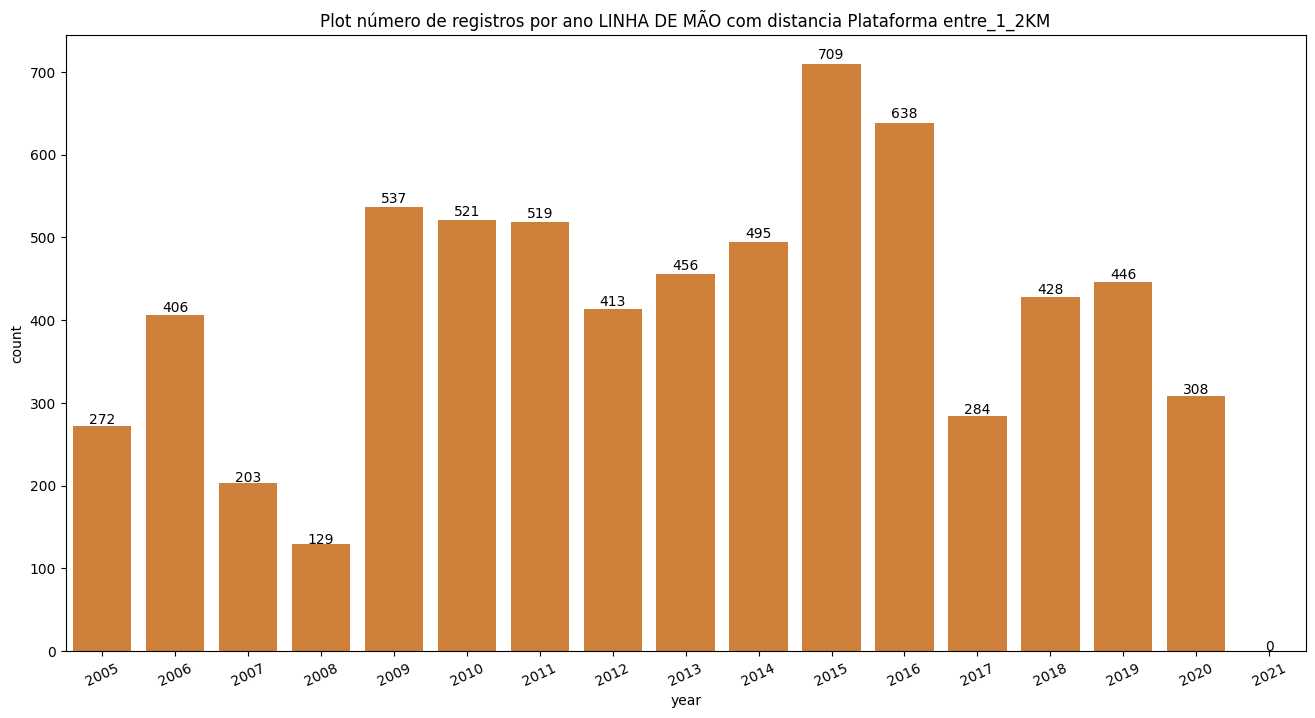

In [38]:
#create vertical barplot
sns_plotYY = sns.barplot(x="year", y="count", data=df_yy_count, color='#e67e22',errorbar=None)
plt.xticks(rotation=25)
mytile = "Plot número de registros por ano {} com distancia Plataforma {}".format(subarte, distGas)
plt.title(mytile)
#show values on barplot
show_values(sns_plotYY)